<a href="https://colab.research.google.com/github/syedayazsa/Realtime-Face-Indentification/blob/master/face_recognition_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [0]:
from keras.layers import Input, Lambda, Dense, Flatten, Dropout, BatchNormalization
from keras.models import Model
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os

# **LOADING AND UNZIPPING THE DATASET**

In [0]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1ZYzoDqEAEVnVlBCD7PZRsq-sy79WDdqI' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1ZYzoDqEAEVnVlBCD7PZRsq-sy79WDdqI" -O data.zip && rm -rf /tmp/cookies.txt

--2020-05-27 14:20:21--  https://docs.google.com/uc?export=download&confirm=ba8_&id=1ZYzoDqEAEVnVlBCD7PZRsq-sy79WDdqI
Resolving docs.google.com (docs.google.com)... 74.125.28.100, 74.125.28.138, 74.125.28.102, ...
Connecting to docs.google.com (docs.google.com)|74.125.28.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-0g-docs.googleusercontent.com/docs/securesc/q1oq9l5b061gcn9h5gbj3h40he0ckmvb/qcrgjkrnhfk2ghd3evrmoqc8p0o2g8cu/1590589200000/14211000813324722452/03876256827138222073Z/1ZYzoDqEAEVnVlBCD7PZRsq-sy79WDdqI?e=download [following]
--2020-05-27 14:20:21--  https://doc-00-0g-docs.googleusercontent.com/docs/securesc/q1oq9l5b061gcn9h5gbj3h40he0ckmvb/qcrgjkrnhfk2ghd3evrmoqc8p0o2g8cu/1590589200000/14211000813324722452/03876256827138222073Z/1ZYzoDqEAEVnVlBCD7PZRsq-sy79WDdqI?e=download
Resolving doc-00-0g-docs.googleusercontent.com (doc-00-0g-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting to 

In [0]:
!unzip '/content/data.zip'

Archive:  /content/data.zip
replace split_dataset/train/person0/1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: split_dataset/train/person0/1.jpg  
  inflating: split_dataset/train/person0/10.jpg  
  inflating: split_dataset/train/person0/100.jpg  
  inflating: split_dataset/train/person0/101.jpg  
  inflating: split_dataset/train/person0/102.jpg  
  inflating: split_dataset/train/person0/103.jpg  
  inflating: split_dataset/train/person0/104.jpg  
  inflating: split_dataset/train/person0/105.jpg  
  inflating: split_dataset/train/person0/106.jpg  
  inflating: split_dataset/train/person0/107.jpg  
  inflating: split_dataset/train/person0/108.jpg  
  inflating: split_dataset/train/person0/109.jpg  
  inflating: split_dataset/train/person0/11.jpg  
  inflating: split_dataset/train/person0/110.jpg  
  inflating: split_dataset/train/person0/111.jpg  
  inflating: split_dataset/train/person0/112.jpg  
  inflating: split_dataset/train/person0/113.jpg  
  inflating: split_dataset

# **SPECIFYING PATHS TO DIRECTORY**

In [0]:
from glob import glob
base_path = '/content/split_dataset'
folders = glob('/content/split_dataset/train/*')
print(folders)

['/content/split_dataset/train/person3', '/content/split_dataset/train/person4', '/content/split_dataset/train/person0', '/content/split_dataset/train/person2', '/content/split_dataset/train/person1']


In [0]:
IMAGE_SIZE = [224, 224]

train_path = '/content/split_dataset/train'
valid_path = '/content/split_dataset/validation'

# **VGG-16 PRE-MODEL**

In [0]:
x = Flatten()(vgg.output)
x = Dense(2048, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(868, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [0]:
model_vgg = Model(inputs=vgg.input, outputs=prediction)
model_vgg.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0  

In [0]:
model_vgg.compile(
  loss='categorical_crossentropy',
  optimizer= 'adam',
  metrics=['accuracy']
)

# **IMAGE AUGMENTATION**

In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    rescale = 1./255,
    fill_mode = 'nearest')

validation_datagen = ImageDataGenerator(
    rotation_range = 60,
    width_shift_range = 0.3,
    height_shift_range = 0.3,
    shear_range = 0.3,
    zoom_range = 0.3,
    horizontal_flip = True,
    rescale = 1./255,
    fill_mode = 'nearest')

training_set = train_datagen.flow_from_directory('/content/split_dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

validation_set = validation_datagen.flow_from_directory('/content/split_dataset/validation',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1193 images belonging to 5 classes.
Found 299 images belonging to 5 classes.


# **TRAINING THE MODEL**

In [0]:
history_vgg = model_vgg.fit_generator(
  training_set,
  validation_data=validation_set,
  epochs=15,
  verbose = 1,
  steps_per_epoch=400,
  validation_steps=80
  )

Epoch 1/15
400/400 [==============================] - 199s 497ms/step - loss: 1.5881 - accuracy: 0.3108 - val_loss: 1.4139 - val_accuracy: 0.5966
Epoch 2/15
400/400 [==============================] - 193s 483ms/step - loss: 0.6189 - accuracy: 0.7666 - val_loss: 1.0784 - val_accuracy: 0.8010
Epoch 3/15
400/400 [==============================] - 190s 474ms/step - loss: 0.3440 - accuracy: 0.8932 - val_loss: 0.4567 - val_accuracy: 0.7897
Epoch 4/15
400/400 [==============================] - 188s 470ms/step - loss: 0.2966 - accuracy: 0.9100 - val_loss: 0.2048 - val_accuracy: 0.8353
Epoch 5/15
400/400 [==============================] - 188s 470ms/step - loss: 0.2480 - accuracy: 0.9237 - val_loss: 0.2959 - val_accuracy: 0.9097
Epoch 6/15
400/400 [==============================] - 190s 476ms/step - loss: 0.2323 - accuracy: 0.9311 - val_loss: 0.5871 - val_accuracy: 0.9264
Epoch 7/15
400/400 [==============================] - 190s 476ms/step - loss: 0.2289 - accuracy: 0.9323 - val_loss: 0.4359 -

# **LOSS AND ACCURACY CURVES**

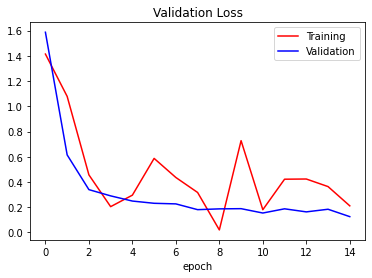

In [0]:
plt.plot(history_vgg.history['val_loss'], color = 'r')
plt.plot(history_vgg.history['loss'], color = 'b')
plt.title('Validation Loss')
plt.xlabel('epoch')
plt.legend(['Training' ,'Validation'])

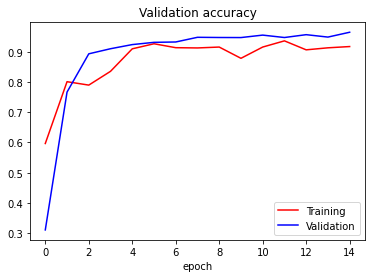

In [0]:
plt.plot(history_vgg.history['val_accuracy'], color = 'r')
plt.plot(history_vgg.history['accuracy'], color = 'b')
plt.title('Validation accuracy')
plt.xlabel('epoch')
plt.legend(['Training' ,'Validation'])

# **SAVING THE MODEL IN DRIVE**

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
model_vgg.save('/content/gdrive/My Drive/Model/facedetection_vgg.h5')